### Import

In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report

### Enable GPU

In [23]:
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        pass

Num GPUs Available:  1


### Load data

In [24]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

### Data pre-processing

In [25]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

### Build & Compile model

In [26]:
def build_model(shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.SimpleRNN(units=256, dropout=0.2, input_shape=(shape), return_sequences=True),
        tf.keras.layers.SimpleRNN(units=128),
        tf.keras.layers.Dense(units=10, activation='softmax'),
    ])
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

model = build_model(X_train[0].shape)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 28, 256)           72960     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               49280     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 123,530
Trainable params: 123,530
Non-trainable params: 0
_________________________________________________________________


### Model fit

In [27]:
epochs = 20
batch_size = 64

history = model.fit(X_train, y_train, epochs=epochs, validation_split=0.2, batch_size=batch_size)

loss, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)

print(f"Loss: {loss*100:.2f}%")
print(f"Accuracy: {accuracy*100:.2f}%\n")

Epoch 1/20
750/750 [==============================] - 30s 38ms/step - loss: 0.5351 - accuracy: 0.8449 - val_loss: 0.2256 - val_accuracy: 0.9356
Epoch 2/20
750/750 [==============================] - 28s 37ms/step - loss: 0.2399 - accuracy: 0.9290 - val_loss: 0.1553 - val_accuracy: 0.9551
Epoch 3/20
750/750 [==============================] - 27s 36ms/step - loss: 0.1815 - accuracy: 0.9457 - val_loss: 0.1229 - val_accuracy: 0.9639
Epoch 4/20
750/750 [==============================] - 27s 37ms/step - loss: 0.1503 - accuracy: 0.9553 - val_loss: 0.1310 - val_accuracy: 0.9605
Epoch 5/20
750/750 [==============================] - 27s 37ms/step - loss: 0.1272 - accuracy: 0.9621 - val_loss: 0.0967 - val_accuracy: 0.9710
Epoch 6/20
750/750 [==============================] - 27s 37ms/step - loss: 0.1174 - accuracy: 0.9641 - val_loss: 0.0887 - val_accuracy: 0.9751
Epoch 7/20
750/750 [==============================] - 20s 27ms/step - loss: 0.1041 - accuracy: 0.9685 - val_loss: 0.0864 - val_accuracy:

### Plots and tests

In [28]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

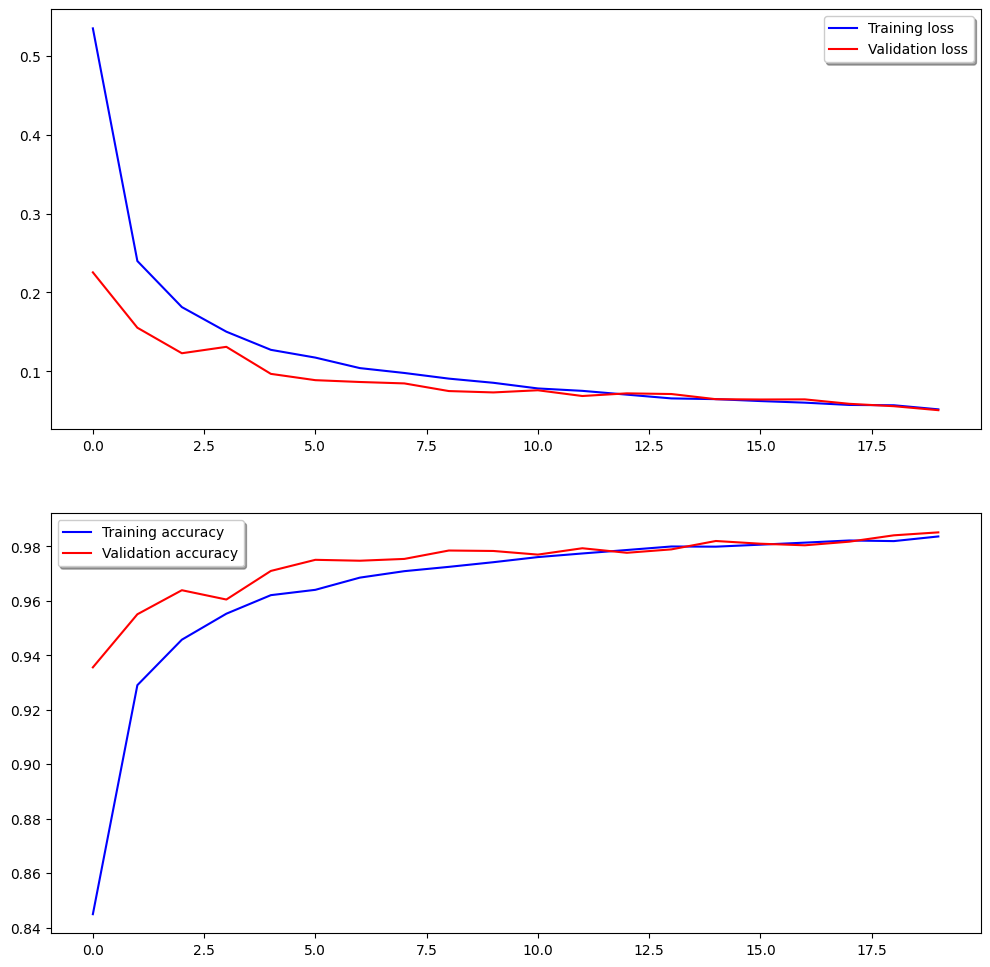

In [29]:
# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss", axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

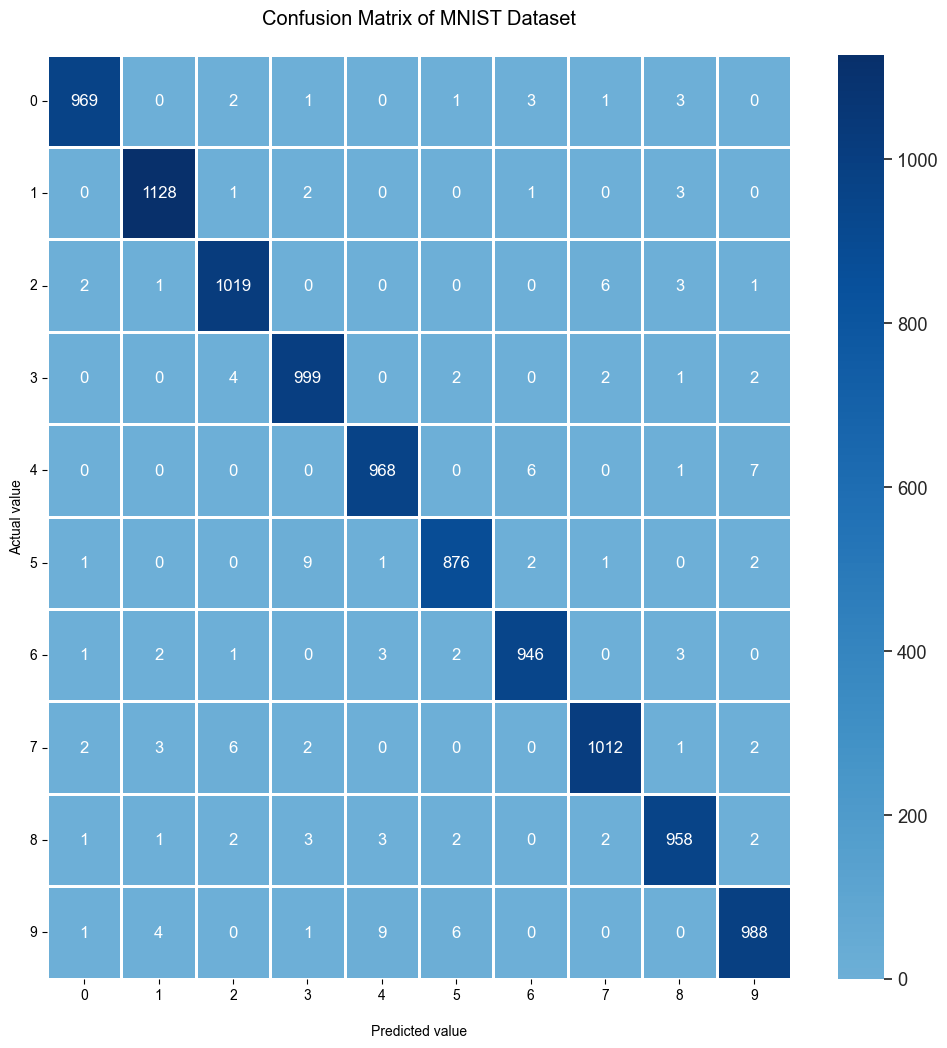

In [30]:
# Plot the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
f, ax = plt.subplots(figsize=(12, 12))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mtx, annot=True, linewidths=1, annot_kws={"size": 12}, center=10.0, cmap="Blues", ax=ax, fmt='g')
ax.set(title="Confusion Matrix of MNIST Dataset\n",
      xlabel="\nPredicted value",
      ylabel="Actual value")
ax.set_xticklabels(labels=range(10), rotation=0, horizontalalignment='center', verticalalignment='top')
ax.set_yticklabels(labels=range(10), rotation=0, horizontalalignment='right', verticalalignment='center')
plt.show()

In [31]:
# Plot the classification report
target_names = [f"Class {i}" for i in range(10)]
print(classification_report(y_true, y_pred_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.98      0.99      0.99      1032
     Class 3       0.98      0.99      0.99      1010
     Class 4       0.98      0.99      0.98       982
     Class 5       0.99      0.98      0.98       892
     Class 6       0.99      0.99      0.99       958
     Class 7       0.99      0.98      0.99      1028
     Class 8       0.98      0.98      0.98       974
     Class 9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [32]:
# Print the multilabel confusion matrix
confusion_matrices = multilabel_confusion_matrix(y_true, y_pred_classes)

for i, matrix in zip(range(10), confusion_matrices):
    print(f"Class {i}:")
    print(f"True Positive(TP): {matrix[1][1]} - False Positive(FP): {matrix[0][1]}")
    print(f"False Negative(FN): {matrix[1][0]} - True Negative(TN): {matrix[0][0]}")
    print("----------------------------------------------------")

Class 0:
True Positive(TP): 969 - False Positive(FP): 8
False Negative(FN): 11 - True Negative(TN): 9012
----------------------------------------------------
Class 1:
True Positive(TP): 1128 - False Positive(FP): 11
False Negative(FN): 7 - True Negative(TN): 8854
----------------------------------------------------
Class 2:
True Positive(TP): 1019 - False Positive(FP): 16
False Negative(FN): 13 - True Negative(TN): 8952
----------------------------------------------------
Class 3:
True Positive(TP): 999 - False Positive(FP): 18
False Negative(FN): 11 - True Negative(TN): 8972
----------------------------------------------------
Class 4:
True Positive(TP): 968 - False Positive(FP): 16
False Negative(FN): 14 - True Negative(TN): 9002
----------------------------------------------------
Class 5:
True Positive(TP): 876 - False Positive(FP): 13
False Negative(FN): 16 - True Negative(TN): 9095
----------------------------------------------------
Class 6:
True Positive(TP): 946 - False Positi

### Test the model

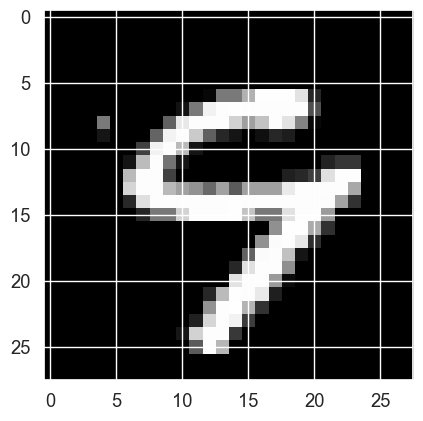

The image above is: 9
The model predicted: 9


In [34]:
# Test the model with a random image from the test dataset
i = random.randint(0, X_test.shape[0])
plt.imshow(X_test[i], cmap='gray')
plt.show()
print(f"The image above is: {np.argmax(y_test[i])}")

# Predict the class of the image
pred = model.predict(X_test[i].reshape(1, 28, 28))
print(f"The model predicted: {pred.argmax()}")


### Save/Load the model

In [35]:
# Save the model
model.save('../mnist_rnn.h5')

In [7]:
# Load the model
model = tf.keras.models.load_model('../mnist_rnn.h5')

2023-04-06 23:02:46.763779: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 23:02:47.549482: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4657 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1660 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5
